# Seaborn ile Doğrusal Regresyon

🚀 Seaborn kullanarak Doğrusal Regresyon analizine görsel olarak başlayalım!

Hedefimiz aşağıdakilerin ilk anlayışını elde etmektir:
- `orders` özelikleri ve
- onlarla ilişkili `review_scores`

In [7]:
import sys
sys.path.append("/home/zeynepdil/code/data-orders")
print(sys.path[-1])

/home/zeynepdil/code/data-orders


In [8]:
import olist
print("olist OK")


olist OK


In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ Devam etmeden önce:
* 💾 Önceki ünitenin Orders challenge'ının çözümünü indirin
* 👥 `order_solution.py` dosyasının içeriğini `olist/order.py` dosyanıza kopyala-yapıştır yapın

⚠️ `olist` deponuzda `order.py` dosyasındaki kod değişikliklerini commit etmeyi unutmayın!

👇 Öncelikle `orders` veri setini içeri aktarın

In [13]:
# Import your orders training set
from olist.order import Order
#print("Import OK")
orders = Order().get_training_data(with_distance_seller_customer=False)
orders.shape

(96353, 12)

In [14]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'review_score', 'dim_is_five_star', 'dim_is_one_star',
       'number_of_items', 'number_of_sellers', 'price', 'freight_value'],
      dtype='object')

## 1 - Özellik Korelasyonunu İnceleme

❓Özellikler arasındaki çeşitli korelasyonları inceleyin: hangi özellik `review_score` ile en çok korelasyonlu görünüyor?

<details>
    <summary>▸ İpucu</summary>

* `DataFrame.corr(numeric_only=True)` kullanın `sns.heatmap()` ve `cmap='coolwarm'` ile kombinasyon yaparak
* `review_score` ile her bir özellik arasındaki korelasyon katsayılarının mutlak değerlerine bakın,
    * katsayı ne kadar yüksekse, verilen özellik `review_score` ile o kadar çok korelasyonludur (pozitif veya negatif)

</details>

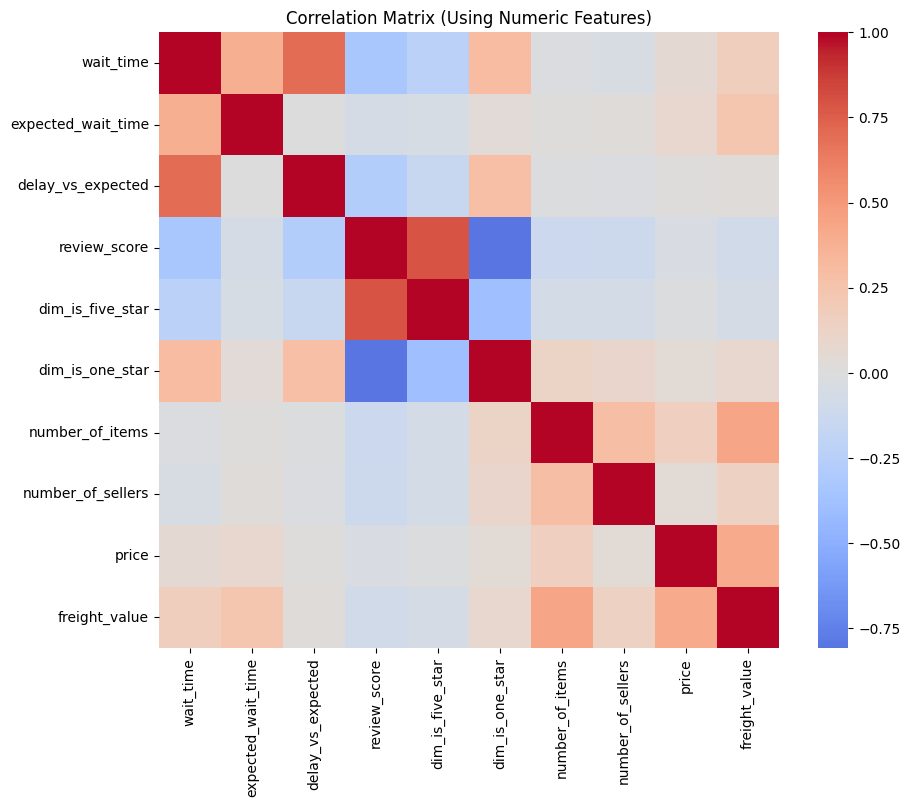

In [ ]:
# Sadece sayısal değişkenler
corr = orders.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix (Using Numeric Features)")
plt.show()






In [16]:
#review_ score ile korrelasyonlari isaretlerine bakmaksizin bulma
review_corr = (
    corr["review_score"]
    .drop("review_score")      # kendisiyle %100 korelasyonu çıkar
    .abs()                     # mutlak değer
    .sort_values(ascending=False)
)

review_corr.head(10)

dim_is_one_star       0.807700
dim_is_five_star      0.791787
wait_time             0.333758
delay_vs_expected     0.272281
number_of_items       0.123492
number_of_sellers     0.116942
freight_value         0.090013
expected_wait_time    0.052410
price                 0.034742
Name: review_score, dtype: float64

* 😏 _Kaptan Açık :_
    * `review_score` kendisiyle %100 korelasyonludur
    * ve `dim_is_one_star` ve `dim_is_five_star` ile güçlü korelasyonludur...
* ⚠️ `review_score` ile ilgili sonraki iki en yüksek korelasyon katsayısı :
    * `wait_time` : - %34
    * `delay_vs_expected` : - %27

## 2. `review_score` ile teslimat süresi arasında Doğrusal Regresyon

👉 Görünüşe göre `review_score` çoğunlukla `wait_time` (= - %34) ve `delay_vs_expected` (- %27) ile korelasyonludur.

🎨 Bu korelasyonları `seaborn` ile araştıralım

### 2.1 Grafikler
❓ Sırasıyla `review_score` ile `wait_time` ve `delay_vs_expected` arasında regresyon yapan 2 grafik oluşturun.

<u>İpuçları</u>:

- Hız açısından veri çerçevesini rastgele bir `10.000 satırlık örneğe` indirin (veri keşiflemede iyi bir uygulama)
- Gerekirse her yürütmede örneği değiştirilmekten kaçınmak için `DataFrame.sample()` sabit bir `random_state` ile kullanın
- Regresyon `lines` çizmek için `sns.regplot()` kullanın
- Saçılım grafiğinin yoğunluğunu daha iyi görselleştirmek için bazı `y_jitter` parametreleri ekleyin
- `sns.regplot()` hemen sonrasına bunu ekleyerek `xlim` ve `ylim` sınırlayın (aynı hücrede):
  ```python
  plt.xlim(right=70)
  plt.ylim(bottom=0)
  ```

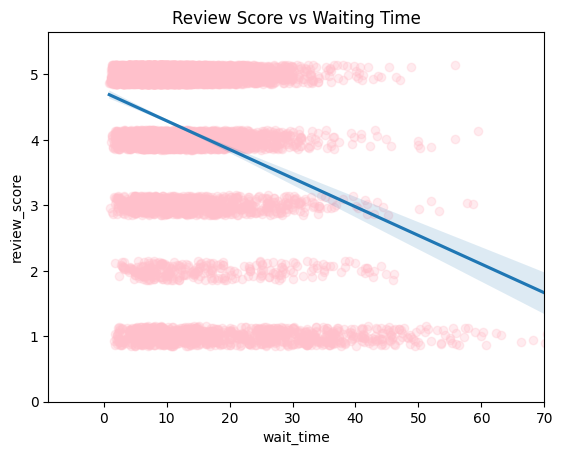

In [22]:
samples = orders.sample(n=10_000, random_state=42)

sns.regplot(
    data=samples,
    x="wait_time",
    y="review_score",
    y_jitter=0.15,
    scatter_kws={"alpha": 0.3, "color": "pink"}
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Review Score vs Waiting Time")
plt.show()


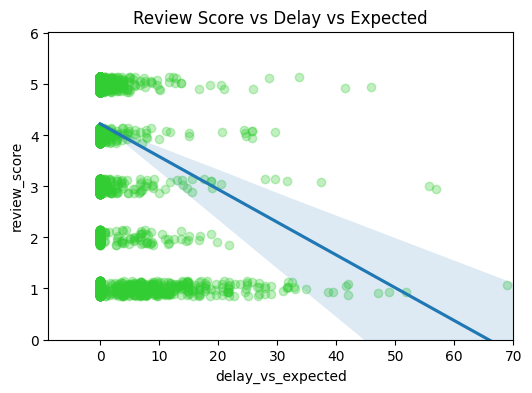

In [23]:
plt.figure(figsize=(6, 4))

sns.regplot(
    data=samples,
    x="delay_vs_expected",
    y="review_score",
    y_jitter=0.15,
    scatter_kws={"alpha": 0.3, "color": "limegreen"}
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Review Score vs Delay vs Expected")
plt.show()


ℹ️ `regplot` ne yaptı ? 

👉 `review_score` ile `wait_time` ve `delay_vs_exp` arasında `Doğrusal Regresyon` yapmaya çalıştı

🧐 Pek yorumlanabilir görünmüyor, değil mi ?

👉 Haklısınız: sadece 5 farklı review skoru vardır ve bunlar beş farklı olası değeri olan kategorisel bir değişken olarak yorumlanabilir (örneğin: "çok kötü", "kötü", "orta", "iyi" ve "çok iyi") ve `wait_time` ve `delay_vs_exp` olan iki sürekli değere karşı regresyon yapmaya çalışıyoruz.

👀 Ancak regresyon çizgilerine göre çok sezgisel bir desen görebiliriz: bekleme süresi ve/veya gecikme ne kadar uzunsa, review skoru o kadar düşüktür - şaşırtıcı değil. Ama review skoru ne kadar hızlı düşüyor ?

### 2.2 Yorumlama

❓Her eğrinin `eğimini` görsel olarak "hesaplamaya" çalışın. 

✍️ Bu katsayıları veri eğitimi almamış bir kitleye açıklamış olsaydınız, bunları nasıl yorumlayacağınızı yazın.

<details>
    <summary>Cevap</summary>

- `Slope wait_time ≈ -0.05` : "Bir sipariş teslim edilmesi için beklenen her ek gün için, review skoru ortalama olarak 0.05 azalır"
- `Slope delay ≈ -0.1` : "Bir sipariş _beklenen teslimat tarihinden sonra_ teslim edilmesi için her ek gün, review skoru ortalama olarak 0.1 azalır"

❓ Gecikmenin bekleme süresinden daha etkileyici görünmesine şaşırdınız mı? 

👉 Siparişinizi almak için sabırsız olabilirsiniz ve kısa bir bekleme süresi istersiniz, ancak paketinizi beklenen teslimat tarihinden sonra almaktan daha da hayal kırıklığına uğrarsınız!

</details>

### 2.3 Çıkarımsal Analiz

Bu regplotlar için 100.000 siparişin tamamını kullansak bile, bu siparişler sonuçta sadece 16 ayın verilerini temsil eder...

⚠️⚠️⚠️ Bu katsayıların **istatistiksel olarak anlamlı** olduğundan **ne kadar emin** olduğumuz? ⚠️⚠️⚠️

⚡️ Bu katsayıların istatistiksel anlamlılığı hakkında sorular:

* Bu katsayılar gelecekteki siparişlere iyi bir şekilde genelleştirilebilir mi (diğer her şey eşit olarak) ? (*İdeal cevap: Evet*) 
* Bu katsayıların sınırlı gözlem döneminden kaynaklanan rastgele dalgalanmalar yakalamadığından emin miyiz ? (*İdeal cevap: Hayır*) 

🧐 Bu iki eğim için ortalama değer etrafında **`güven aralığını`** tahmin etmemiz gerekir  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[%95 aralık]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[%95 aralık]} $$

⭐️ Neyse ki, `Seaborn` bu %95 güven aralığını regresyon çizgisinin etrafında gölgeli bir mavi koni ile zaten hesaplamıştır!

❓`Seaborn` `regplot` yeniden kullanarak iki güven aralığını görselleştirin:
- Örnek veri setinizin `boyutunu değiştirin`: 
    - Örnek boyutu küçüldükçe eğimin nasıl değiştiğine dikkat edin. 
    - Güven aralığı hakkında ne dersiniz?
- `ci` adlı regplot parametresi ile oynayarak `güven aralığının boyutunu` değiştirin (%95 varsayılan)

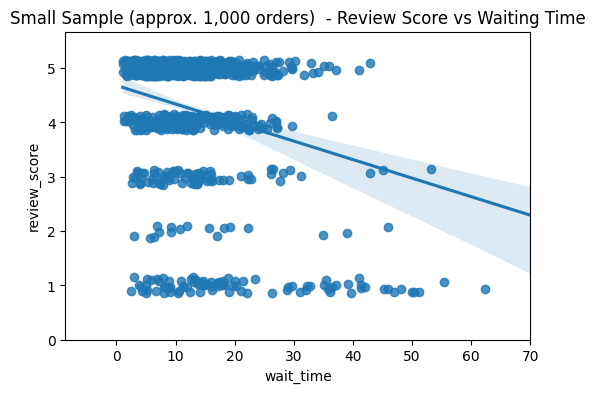

In [33]:
#daha az sayida siparis verisiyle güven araligini gösterme
small_samples = orders.sample(n=1_000, random_state=42)

plt.figure(figsize=(6, 4))
sns.regplot(
    data=small_samples,
    x="wait_time",
    y="review_score",
    y_jitter=0.15
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Small Sample (approx. 1,000 orders)  - Review Score vs Waiting Time")
plt.show()





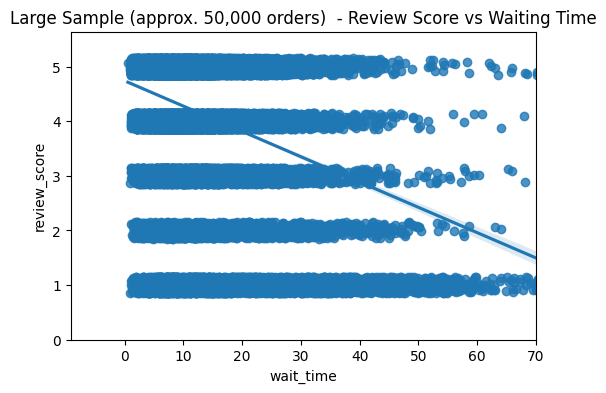

In [32]:
#daha fazla sayida siparis verisiyle güven araligini gösterme
large_samples = orders.sample(n=50_000, random_state=42)

plt.figure(figsize=(6, 4))
sns.regplot(
    data=large_samples,
    x="wait_time",
    y="review_score",
    y_jitter=0.15
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Large Sample (approx. 50,000 orders)  - Review Score vs Waiting Time")
plt.show()


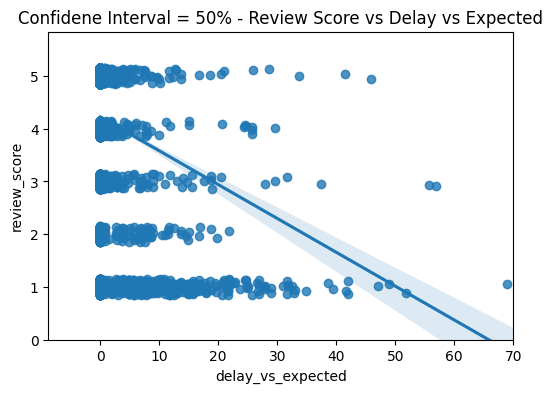

In [34]:
plt.figure(figsize=(6, 4))
sns.regplot(
    data=samples,
    x="delay_vs_expected",
    y="review_score",
    ci=50,
    y_jitter=0.15
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Confidene Interval = 50% - Review Score vs Delay vs Expected")
plt.show()


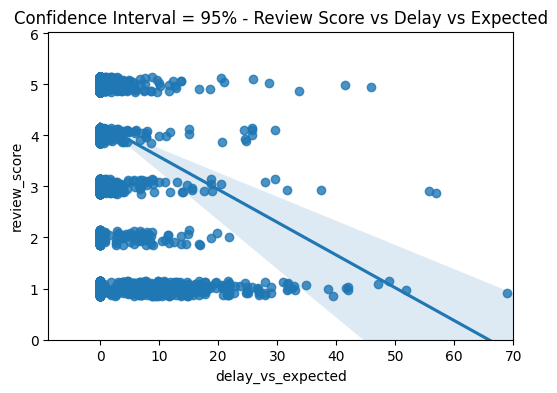

In [35]:
plt.figure(figsize=(6, 4))
sns.regplot(
    data=samples,
    x="delay_vs_expected",
    y="review_score",
    ci=95,
    y_jitter=0.15
)

plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Confidence Interval = 95% - Review Score vs Delay vs Expected")
plt.show()


🔎 Yorumlama:

* **Boş Hipotez** $H_0$ : "bu değişken review skoru etkilemez", yani katsayısı sıfıra eşittir

Tüm veri noktalarımızı çizdiğimizde:
- Eğim için %95 güven aralığı 0 değerini içermez.
    - 👉 `Daha yavaş teslimatların daha zayıf yorumlarla ilişkili olduğundan %95 emin`.
- "Teslimat süresinin review skorları üzerindeki etkisi hemen hemen sıfırdır" boş hipotezi ile ilişkili **`p-değeri`** %5'ten düşüktür
    - 👉 Bu boş hipotezi güvenle reddedebilir ve **`alternatif hipotez`** = `"teslimat süresi review skoru üzerinde etkiye sahiptir"` düşünebiliriz

🔥 Bulguşlarımızın **istatistiksel olarak anlamlı** olduğu söylenir. 

⚠️ Ancak, **korelasyon nedensellik anlamına gelmez**. 

- Belirli ürünlerin teslimatı doğal olarak daha yavaş olabilir (örn. ağır ürünler)
    - Bu ürün kategorileri, teslimat sürelerinin ne kadar uzun olursa olsun, genellikle düşük review_score'a sahip olacaktır. 

👉 **Karıştırıcı faktörleri** tanımlamak çok önemlidir ve basit bir tek değişkenli regresyon ile yapılamaz. 

</details>

---
🏁 Tebrikler! 

🙏 Notebook'unuzu `commit` ve `push` etmeyi unutmayın